In [9]:
import numpy as np
import matplotlib.pyplot as plt

In [10]:
def simulate_gbm(S0, mu, sigma, T, N, num_simulations=1):
    dt = T / N
    S_paths = np.zeros((num_simulations, N))
    for i in range(num_simulations):
        W = np.random.randn(N) * np.sqrt(dt)  # Brownian motion increments
        S = np.zeros(N)
        S[0] = S0
        for t in range(1, N):
            S[t] = S[t-1] * np.exp((mu - 0.5 * sigma**2) * dt + sigma * W[t])
        S_paths[i, :] = S
    return S_paths

In [11]:
# Parameters
S0 = 100  # Initial price
mu = 0.05  # Drift for GBM
sigma_gbm = 0.2  # Volatility for GBM
T = 1  # Time horizon (1 year)
N = 252  # Number of time steps (daily data)
kappa = 0.3  # Mean reversion speed
sigma_mr = 2  # Volatility for Mean-Reverting model
mu_mr = 100  # Long-run mean for Mean-Reverting model
X0 = 100  # Initial value for Mean-Reverting model
num_simulations = 10  # Number of paths to simulate

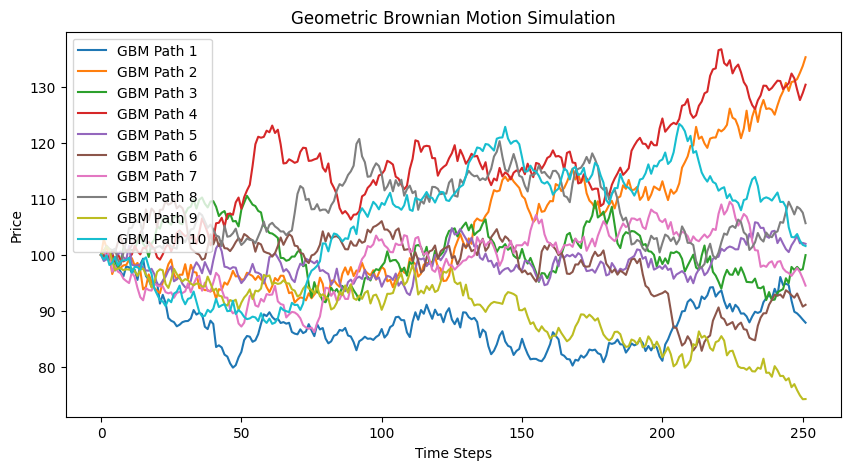

In [12]:
# Simulate and plot GBM
S_gbm_paths = simulate_gbm(S0, mu, sigma_gbm, T, N, num_simulations)
plt.figure(figsize=(10, 5))
for i in range(num_simulations):
    plt.plot(S_gbm_paths[i, :], label=f'GBM Path {i+1}')
plt.title('Geometric Brownian Motion Simulation')
plt.xlabel('Time Steps')
plt.ylabel('Price')
plt.legend()
plt.show()

In [13]:
# Function to estimate parameters from historical data
def estimate_gbm_parameters(price_series, dt):
    returns = np.diff(np.log(price_series))
    mu_hat = np.mean(returns) / dt
    sigma_hat = np.std(returns) / np.sqrt(dt)
    return mu_hat, sigma_hat